
# Week 8 Decision Trees
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Tutorial Overview
Hi everyone! Welcome to the week 8 Lab - Regression!

Here's an outline of the lab:

     1) Linear Regression applied to the Iris dataset

     2) Logistic Regression applied to the Titanic dataset




**Tips to get the most out of this tutorial:**
1. Make sure you carefully read and understand how the example code works.  
2. Try your best before looking at the hidden solutions








# Applying Linear Regression to a toy dataset

In this section we'll take a look at a dataset that we saw last time: The IRIS dataset. Recall that this is a labelled dataset that has 4 features for each datapoint. It stores the sepal length in cm for a flower, the sepal width in cm, the petal length in cm, and the petal width in cm. It also has a label telling us which flower this data point is for. There are 3 possible classes (i.e. types of flowers) represented in this data set: Iris Setosa, Iris Versiclolour, and Iris Virgnica. There are 150 samples (datapoints) in this dataset. Lets import the dataset. 

In [2]:
# Import Dataset from sklearn
from sklearn.datasets import load_iris
import pandas as pd
# Load Iris Data
iris = load_iris()


In [3]:
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
# this is a quick way to convert the labels into something more readable
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


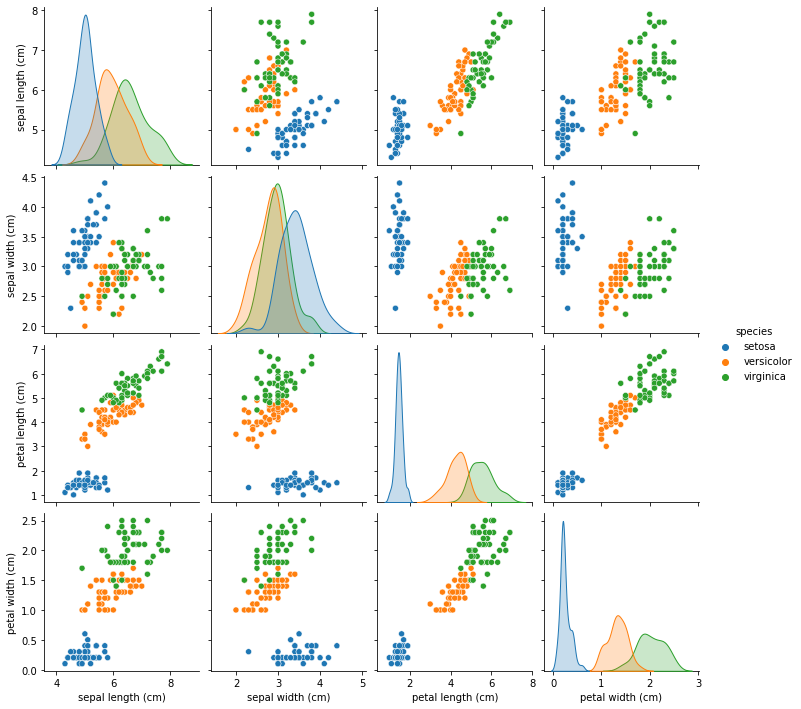

In [5]:
import seaborn as sns

# this is another data visualization tool we can use for our datasets in the
# future!
sns.pairplot(iris_df, hue= 'species')


Linear regression is one of the most basic machine learning teachniques you will use. We are learning it because it provides a good foundation for you to build off of. Starting off, we will use a linear approach to modelling the relationship between a scalar response (y — dependent variables) and one or more explanatory variables (X — independent variables).

From this toy dataset we'll be predicting sepal length using linear regression.



In [6]:
from sklearn.model_selection import train_test_split

# Re-converting the species label into numerical values
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)

# Separating out the data we want to predict
X= iris_df.drop(labels= 'sepal length (cm)', axis= 1)
y= iris_df['sepal length (cm)']

# TODO:
# Split the Dataset 
X_train, X_test, y_train, y_test = 


SyntaxError: ignored

In [ ]:
#@title Solution (Double Click To See):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 1)


In [ ]:
from sklearn.linear_model import LinearRegression
# Instantiating LinearRegression() Model
lr = LinearRegression()


# Training/Fitting the Model
lr.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Let's see our model in action!

In [ ]:
iris_df.loc[9]

In [ ]:
# Let's convert this information into a dataframe and run it through our model
d = {'sepal length (cm)' : [4.9],
    'sepal width (cm)' : [3.1],
    'petal length (cm)' : [1.5],
    'petal width (cm)' : [0.1],
    'species' : 0}
test_df = pd.DataFrame(data= d)
test_df

In [ ]:
pred = lr.predict(X_test)
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.9)

This was just a simple example of how we can apply linear regression to a problem. In the next part of this lab, you'll be taking a look at a famous dataset and apply more complex regression techniques to see more realistic applications of this model. 

#Applying Logistic Regression to the Titanic dataset 


Let's explore a dataset that is in many ways more complicated than the ones we've seen before. This dataset is quite popular on [Kaggle](https://www.kaggle.com/c/titanic), a platform for those interested in applying their ML knowledge to interesting datasets, and competing to see who can develop the best model. 

This dataset stores many pieces of information on the hundreds of passengers aboard the Titanic ship, which sank in April 1912. We're going to try to predict what passengers we'd expect to survive based on the many features stored on them. This dataset will require some preprocessing, and we'll do some visualization to understand what features we think we can remove from the dataset.

Let's get started!

In [ ]:
#Importing our favorite libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now to load our training dataset:

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/Addison-Weatherhead/d4c5a724cbe12b1fa9bc1c961ed620f6/raw/85f4f3c5d7c1f141fc58ad2743b4cfa495373e85/train.csv")
from sklearn.model_selection import train_test_split

train, test = train_test_split(data)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S


The Kaggle page gives us a nice look at what all the fields mean:


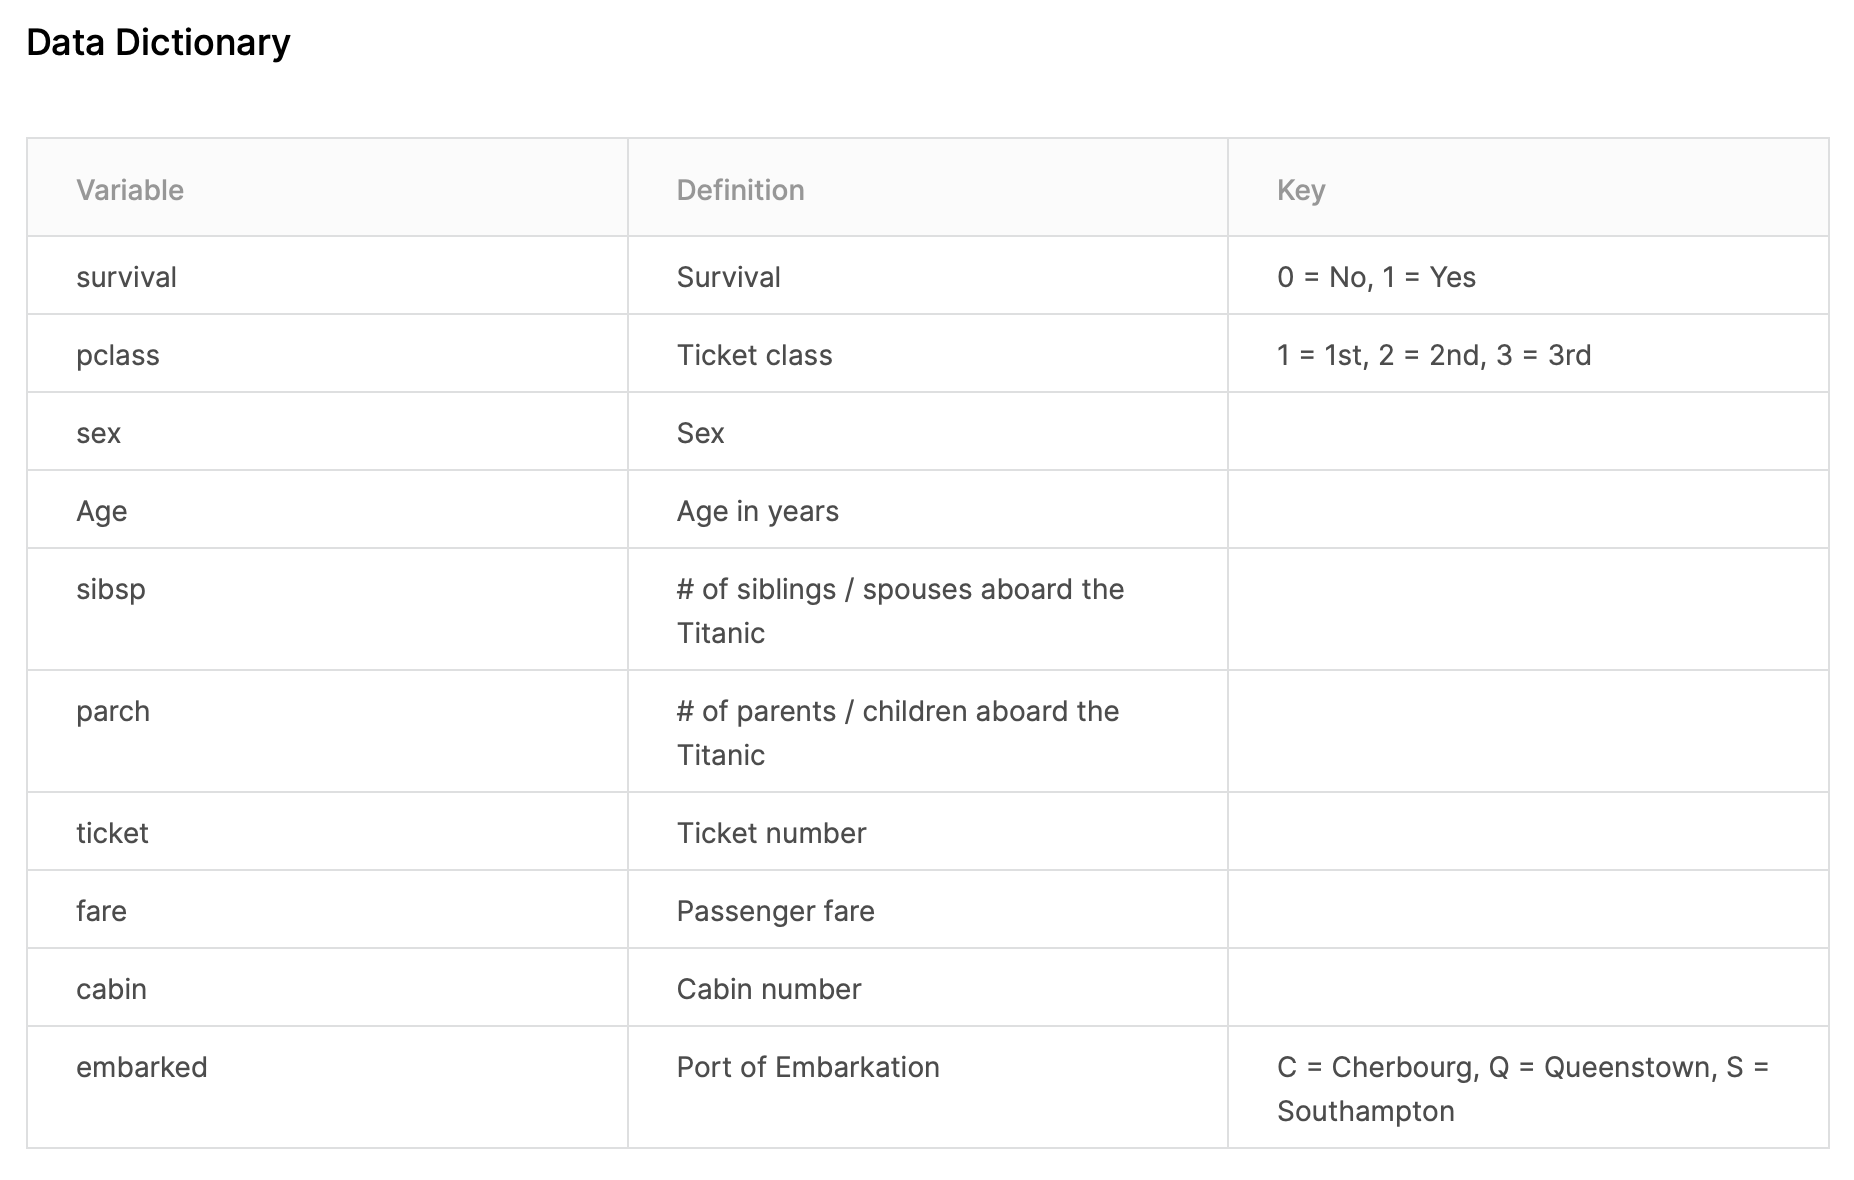

In [ ]:
# Let's also take a quick look at the count for each feature:
train.count()

PassengerId    668
Survived       668
Pclass         668
Name           668
Sex            668
Age            528
SibSp          668
Parch          668
Ticket         668
Fare           668
Cabin          145
Embarked       667
dtype: int64

It looks like we've got some missing values for Cabin and Age, and 2 missing values for Embarked

**Data Exploration**

In [ ]:
# Let's take a look at the number of deaths for each class of ticket
# (i.e. first class, second class, third class)

#TODO: Use the countplot method in seaborn to visualize this relationship in a 
# bar graph.

# While we're at it, let's see how a few other variables relate to deaths.
#TODO: Plot deaths based on Sex


#TODO: Plot deaths based on # siblings/spouses



#TODO: Plot deaths based on # parents/children



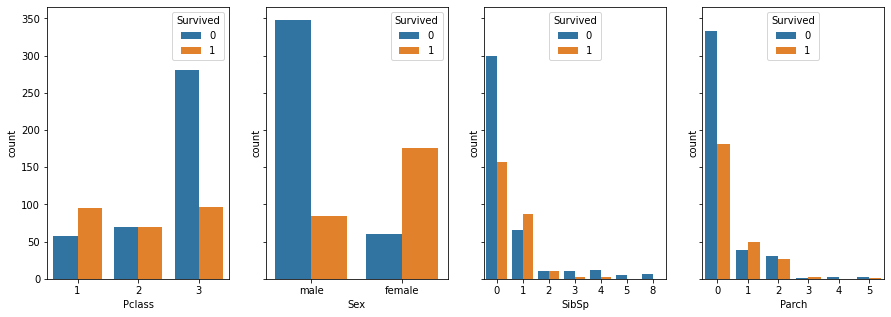

In [ ]:
#@title Solution (Double Click to See)
# Let's take a look at the number of deaths for each class of ticket
# (i.e. first class, second class, third class)

fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

sns.countplot(ax=axes[0], x='Pclass', hue='Survived', data=train)

sns.countplot(ax=axes[1], x='Sex', hue='Survived', data=train)

sns.countplot(ax=axes[2], x='SibSp', hue='Survived', data=train)

sns.countplot(ax=axes[3], x='Parch', hue='Survived', data=train)

It looks like all of these are very indicative of death, so we'll mostly stick to these features for our model.


Recall that we noticed we have many Null values for Age. We're going to use a statistical practice called imputation, meaning we will replace the null values with something we think is reasonable. In this case, we'll just replace the Null values with the average of the values we do have.


In [ ]:
# TODO Find the average Age value and replace all NAN age values with it:




In [ ]:
#@title Solution (Double Click To See)
# We can compute the average age very easily:
avg_train = train["Age"].mean()

train["Age"].fillna(value=avg_train, inplace=True)


avg_test = test["Age"].mean()

test["Age"].fillna(value=avg_test, inplace=True)

# We can see that Age now has 668 values!
train.count()



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


PassengerId    668
Survived       668
Pclass         668
Name           668
Sex            668
Age            668
SibSp          668
Parch          668
Ticket         668
Fare           668
Cabin          145
Embarked       667
dtype: int64

Let's replace gender values with numbers

In [ ]:
train["Sex"].replace(to_replace="male", value=1, inplace=True)
train["Sex"].replace(to_replace="female", value=0, inplace=True)

test["Sex"].replace(to_replace="male", value=1, inplace=True)
test["Sex"].replace(to_replace="female", value=0, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Here's a cool way to do the same thing: Pandas has a method called get_dummies, which allows you to essentially do the process we just did, but it works even if the variable can take on many values. We'll use it on the "Embarked" field

In [ ]:
train_embarked = pd.get_dummies(train["Embarked"],drop_first=True)
train_embarked



,Q,S
475,0,1
816,0,1
779,0,1
790,1,0
405,0,1
...,...,...
824,0,1
413,0,1
348,0,1
860,0,1


Even though the labels were strings, it assigned them to numeric values, and did so in a consistent way. Notice one row is simply the opposite of the other (i.e. 1 0 or 0 1). Let's drop the second one.

In [ ]:
train_embarked.drop("S", inplace=True, axis=1)

Now to join together this column with our dataframe

In [ ]:

train = pd.concat([train, train_embarked], axis=1)

# We'll also repeat the same process here for our test data as well:
test_embarked = pd.get_dummies(test["Embarked"],drop_first=True)
test_embarked.drop("S", inplace=True, axis=1)
test = pd.concat([test, test_embarked], axis=1)

# Let's take another look at our DF:


Let's also go ahead and separate out our Survived values, as well as remove some other features that we won't use:

In [ ]:
train.drop(["Cabin", "PassengerId", "Ticket", "Embarked", "Name"], inplace=True, axis=1)
test.drop(["Cabin", "PassengerId", "Ticket", "Embarked", "Name"], inplace=True, axis=1)

test.dropna(inplace=True)
train.dropna(inplace=True) # Removes the remaining rows with null values

train_y = train["Survived"]
test_y = test["Survived"]

train.drop("Survived", inplace=True, axis=1)
test.drop("Survived", inplace=True, axis=1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Q
46,3,1,30.452957,1,0,15.5000,1
188,3,1,40.000000,1,1,15.5000,1
684,2,1,60.000000,1,1,39.0000,0
260,3,1,30.452957,0,0,7.7500,1
99,2,1,34.000000,1,0,26.0000,0
...,...,...,...,...,...,...,...
338,3,1,45.000000,0,0,8.0500,0
733,2,1,23.000000,0,0,13.0000,0
18,3,0,31.000000,1,0,18.0000,0
725,3,1,20.000000,0,0,8.6625,0


Now to the model!

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train,train_y)

#We'll take a different approach this time and use the classification 
# report from sklearn. It's worth checking out what these different values mean!
# This is a great resource to learn more: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
predictions = model.predict(test)
from sklearn.metrics import classification_report
print(classification_report(test_y, predictions))



              precision    recall  f1-score   support

           0       0.83      0.85      0.84       141
           1       0.73      0.70      0.71        82

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Thats it for this lab! Try running this model with a different set of features. Can you extract better performance from the data provided?

# References

https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/

https://www.kaggle.com/c/titanic/data?select=train.csv

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

https://medium.com/analytics-vidhya/linear-regression-using-iris-dataset-hello-world-of-machine-learning-b0feecac9cc1


